In [ ]:
# import some useful packages
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy.random import seed
import seaborn as sns

# **Problem presentation**
I considered that missing data causes lack of traceability and incompatibility between different countries, while too many data is just an unnecessary effor. The situation can be easily modelled with a barplot, with on the x axis the countries and on the y axis the amount of data collected/time spent for the data collection

In [ ]:
# start situation, just to give the idea on how I modelled the problem (values are given randomly)
value = randint(2,10,5)
hypothetical_country = pd.Series(['country_X', 'country_Y', 'country_J' ,'country_W', 'country_Z'])
df = pd.concat([pd.Series(value), hypothetical_country], 1) 

<function matplotlib.pyplot.show>

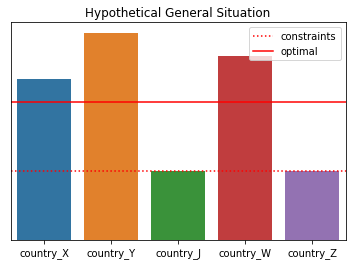

In [ ]:
# graph for the begin situation, countries and values  are given randomly
optimal = 6
graph = sns.barplot(x = hypothetical_country, y = value)
graph.axhline(min(value), color='r', linestyle='dotted', label="constraints") # this line is the benchmark of the country with the lowest amount of data collected, that will decrease the value of the overall analysis
graph.axhline(optimal, color='r', linestyle='-', label="optimal") # this line represents the optimal situation. Values above mean too much work, values below means that work has to be done
graph.set(xlabel = '', ylabel='time spent in data collection',
       title='Hypothetical General Situation')
graph.axes.yaxis.set_visible(False)
labels = ["constraints", 'optimal']
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

In [ ]:
#by taking the difference with hte optimal we can calculate the dat/time  that still need to be collected/ still be spent
time_to_be_spent = sum(value - min(value)) 
countries__missing_data = df[df.loc[:,0] < optimal ][1]
print('the actual time or data that has to be invested/collected is still ', time_to_be_spent, 'days (or whichever unit you want to give).' )
print('hereby the names of the countries that need to improve: ', *df[df.loc[:,0] < optimal ][1])

the actual time or data that has to be invested/collected is still  16 days. 
hereby the names of the countries that need to improve:  country_X country_W


# **Analysis variable by variable**
## Here I start the analysis of the three variables that I consider important:
1. Min Batch Size (50 k seeds disregarding which species is too much, it must be variable)
1. Scoring Stage (I couldn't find a definition on [ISTA](https://www.seedtest.org/upload/cms/user/s4_ISTA_Rules_2021_02_sampling.pdf) but I believe that assessing the cotyledons should be sufficient, as almost all the plants with well developed cotyledons develop leaves. I even believe that waiting till leaves creates some interaction between seedlings that is not wanted in the analysis
1. Stored Results. For a correct and easy going analysis all data has to be stored in the same way, as easy as possible -> if the majority is excel I would keep it

I did not consider the other three variables (*testing period previous to sowing*, *local results scored by* and *local results recorded by*) because:
1. I could not find relevant info on the role of *testing period previous to sowing* apart for seed stratification.
1.*local results recorded by* is always made by Bayer (so should be trustable, and it is a pretty important stage of the process).
1. *local results scored by* is in between Bayer and the growers. I believe that a grower could be easily trained to fullfill the task, but it can be debated ( I am open to discuss and learn).

## 1. Min batch size

In [ ]:
#short analysis for MIN BATCH SIZE

value = pd.Series([9,3,4,4,4,9,6,6,6,6,9,9,8,8,8])
country = pd.Series(['country_A', 'country_B', 'country_C' ,'country_D', 'country_E'])
df = pd.concat([value, pd.concat([country]*3, ignore_index=True)], 1)  # to be improved the readibility, however here I created the two columns


<function matplotlib.pyplot.show>

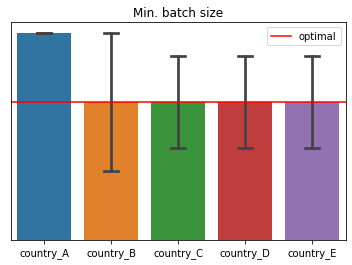

In [ ]:
#here I plot the MIN BATCH SIZE

optimal = 6 # optimal is 'variable' assuming that for each crop the optimal n.seeds is chosen

graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0], capsize=.2)
# capsize represents the uncertainty I have. Country B has larger bars has NA is less trustable than 'variable' for the other 3 following countries


graph.axhline(optimal, color='r', linestyle='-', label="optimal")
graph.set(xlabel = '', ylabel='',
       title='Min. batch size')
graph.axes.yaxis.set_visible(False)
labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

<function matplotlib.pyplot.show>

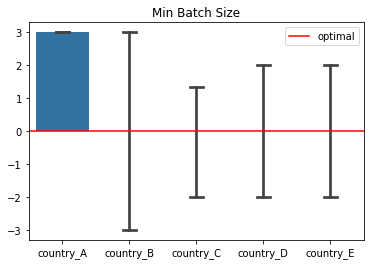

In [ ]:
# I subtract the optimal to each column to get the idea of who works too much and who works too little (MIN BATCH SIZE)
graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0] - optimal, capsize=.2)

graph.axhline(0, color='r', linestyle='-', label="optimal")
graph.set( ylabel='', xlabel='',
       title='Min Batch Size')
#graph.axes.yaxis.set_visible(False)

labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

### 2. Scoring stage

In [ ]:
#short analysis for SCORING STAGE

value = pd.Series([6,7,7,6,6])
country = pd.Series(['country_A', 'country_B', 'country_C' ,'country_D', 'country_E'])
df = pd.concat([value,country], 1)  

<function matplotlib.pyplot.show>

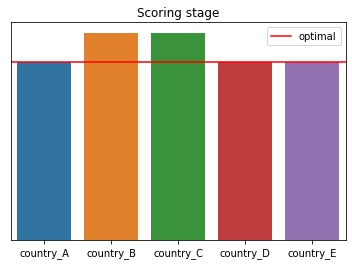

In [ ]:
#here I plot the SCORING STAGE

optimal = 6 # optimal is visible true leaves according to ISTA
graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0], capsize=.2)
#graph.axhline(6, color='r', linestyle='dotted', label="constraints")
graph.axhline(optimal, color='r', linestyle='-', label="optimal")
graph.set(xlabel = '', ylabel='',
       title='Scoring stage')
graph.axes.yaxis.set_visible(False)
labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

<function matplotlib.pyplot.show>

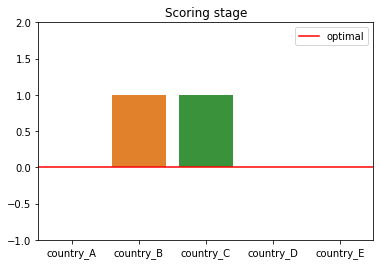

In [ ]:
# I subtract the optimal to each column to get the idea of who works too much and who works too little (SCORING STAGE)
graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0] - optimal)

graph.axhline(0, color='r', linestyle='-', label="optimal")
graph.set( ylabel='', xlabel='',
       title='Scoring stage')
#graph.axes.yaxis.set_visible(False)
plt.ylim(-1,2) 

labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

## 3. Results stored

In [ ]:
#short analysis for RESULTS STORED

value = pd.Series([6,6,4,4,4,6,6,4,6,4,6,6,4,4,4])
country = pd.Series(['country_A', 'country_B', 'country_C' ,'country_D', 'country_E'])
df = pd.concat([value, pd.concat([country]*3, ignore_index=True)], 1)  # to be improved the readibility, however here I created the two columns

<function matplotlib.pyplot.show>

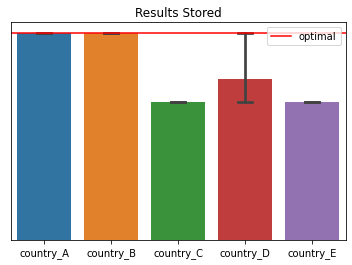

In [ ]:
#here I plot the RESULTS STORED

optimal = 6 # optimal is visible true leaves according to ISTA
graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0], capsize=.2)
#graph.axhline(6, color='r', linestyle='dotted', label="constraints")
graph.axhline(optimal, color='r', linestyle='-', label="optimal")
graph.set(xlabel = '', ylabel='',
       title='Results Stored')
graph.axes.yaxis.set_visible(False)
labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

<function matplotlib.pyplot.show>

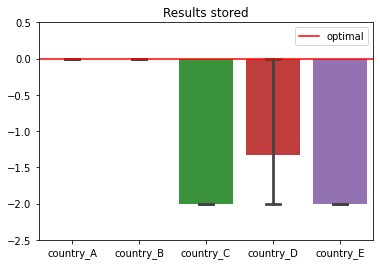

In [ ]:
# I subtract the optimal to each column to get the idea of who works too much and who works too little (RESULTS STORED)
graph = sns.barplot(x = df.iloc[:,1], y = df.iloc[:,0] - optimal, capsize=.2)

graph.axhline(0, color='r', linestyle='-', label="optimal")
graph.set( ylabel='', xlabel='',
       title='Results stored')
#graph.axes.yaxis.set_visible(False)
plt.ylim(-2.5,0.5) 

labels = ["optimal"]
handles, _ = graph.get_legend_handles_labels()

graph.legend(handles = handles, labels = labels)
plt.show

# **Final Remarks**
## Engaging stakeholders, culture of Inform - Consult - Collaborate:
1. train the growers to score according to the standards proposed by Bayer (save moomey in respect to the presence of Bayer employees on the field)
2. involve for a montly or bimonthly meeting the sales and market development teems. Make extra clear the expectations and responsabilities
1. Organize meeting between local sales and labs to homogenize data (in order to make them comparable on a statistical point of view